#Data Science + Linear Algebra = 💗🪄🔮


This notebook explores linear algebra in context of machine learning, specificially in word-vectors (natural language processing) and image recognition. I specifically utilize PCA and other matrix operations that make these models possible. My first model predicts countries that correspond to the capital cities (spacy data) and second model classifies handwritten digits in a simple nerual network (MNIST data).

In [ ]:
# Importing packages.

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import unittest


In [ ]:

# Download SpaCy model (e.g., for English)
nlp = spacy.load('en_core_web_md')


# Words for which we want to get embeddings
words_to_embed = ['italy', 'spain', 'rome', 'madrid', 'king', 'queen']

# Create a dictionary to store word embeddings
word_embeddings = {}

# Populate the dictionary with word embeddings
for word in words_to_embed:
    word_embeddings[word] = nlp(word).vector

# Print the dictionary
print("Word Embeddings Dictionary:")
print(word_embeddings)


Word Embeddings Dictionary:
{'italy': array([-3.9826e+00,  1.1531e+00,  1.7868e+00,  3.7107e+00,  7.1926e+00,
        1.0231e+00,  2.2298e+00,  1.2175e+00,  7.9038e+00,  3.0097e+00,
        7.1705e+00,  5.9793e-01, -3.3046e-01, -5.3045e-01,  1.2284e+00,
       -9.8188e-01, -1.9960e+00, -1.7994e+00, -3.2060e+00, -3.7422e+00,
       -1.1378e+00, -2.6330e+00, -2.7113e+00,  3.9173e+00, -1.7069e+00,
        1.3935e-01, -6.5054e+00, -4.1518e+00,  6.2860e-01, -2.1137e+00,
        5.3560e+00, -2.6263e-01,  4.9889e+00, -2.7348e+00, -1.5514e+00,
       -8.8220e-01, -2.3799e+00,  7.0037e-01, -1.9842e+00, -2.8726e+00,
        7.9003e-01,  4.0629e+00, -4.2370e-02,  2.9812e-01, -1.0631e+00,
       -4.8619e+00, -3.5663e+00,  2.8181e+00, -5.2457e-01,  1.1505e+00,
       -3.0347e-01, -2.1458e+00, -1.3716e+00,  3.8762e-01, -8.5379e-01,
        1.1735e+00, -3.5669e-01, -1.4170e+00,  2.1493e+00,  9.5722e+00,
       -1.0709e+00, -2.7869e+00,  1.3094e+00, -3.8121e+00,  9.8322e+00,
        2.7095e-01, -5.424

In [ ]:
import numpy

def cosine_similarity(A, B):
    '''
    Calculate the cosine similarity between two word vectors.

    Args:
        A (numpy array): A numpy array representing a word vector.
        B (numpy array): A numpy array representing another word vector.

    Returns:
        cos (float): Numerical value representing the cosine similarity between vectors A and B.
    '''

    # Calculate the dot product of vectors A and B
    dot = numpy.dot(A, B)

    # Calculate the Euclidean norm (magnitude) of vector A
    norma = numpy.linalg.norm(A)

    # Calculate the Euclidean norm (magnitude) of vector B
    normb = numpy.linalg.norm(B)

    # Calculate the cosine similarity using the dot product and vector magnitudes
    cos = dot / (norma * normb)

    # Return the calculated cosine similarity
    return cos


In [ ]:
# We test the similarities:
king = word_embeddings['king']
queen = word_embeddings['queen']
italy = word_embeddings['italy']

# Print cosine similarity between 'king' and 'queen'
print("Queen and King: " + str(cosine_similarity(king, queen)))

# Print cosine similarity between 'king' and 'italy'
print("Italy and King: " + str(cosine_similarity(king, italy)))

Queen and King: 0.61088413
Italy and King: 0.2665436


# Predicting capital cities

We can iterate over the embeddings dictionary and compute the cosine similarity score between a target vector (e.g., King - Man + Woman) and each word vector in the dictionary. The predicted word would be the one with the highest cosine similarity score. The cosine similarity score helps us find the similarity between vectors, with higher scores indicating closer semantic relationships.

In [ ]:
# We first add more words to our dictionary:

countries = [
    'afghanistan',
    'albania',
    'algeria',
    'andorra',
    'angola',
    'argentina',
    'australia',
    'austria',
    'bahrain',
    'bangladesh',
    'belgium',
    'brazil',
    'canada',
    'chile',
    'china',
    'colombia',
    'croatia',
    'cuba',
    'denmark',
    'egypt',
    'finland',
    'france',
    'germany',
    'greece',
    'india',
    'indonesia',
    'iran',
    'iraq',
    'ireland',
    'italy',
    'japan',
    'kenya',
    'korea',
    'kuwait',
    'lebanon',
    'malaysia',
    'mexico',
    'morocco',
    'netherlands',
    'new zealand',
    'nigeria',
    'norway',
    'pakistan',
    'peru',
    'poland',
    'portugal',
    'qatar',
    'russia',
    'saudi arabia',
    'south africa',
    'spain',
    'sweden',
    'switzerland',
    'thailand',
    'turkey',
    'united kingdom',
    'united states',
    'vietnam',
    'yemen',
    'zimbabwe',
]

capitals = [
    'kabul',
    'tirana',
    'algiers',
    'andorra la vella',
    'luanda',
    'buenos aires',
    'canberra',
    'vienna',
    'manama',
    'dhaka',
    'brussels',
    'brasília',
    'ottawa',
    'santiago',
    'beijing',
    'bogotá',
    'zagreb',
    'havana',
    'copenhagen',
    'cairo',
    'helsinki',
    'paris',
    'berlin',
    'athens',
    'new delhi',
    'jakarta',
    'tehran',
    'baghdad',
    'dublin',
    'rome',
    'tokyo',
    'nairobi',
    'seoul',
    'kuwait city',
    'beirut',
    'kuala lumpur',
    'mexico city',
    'rabat',
    'amsterdam',
    'wellington',
    'abuja',
    'oslo',
    'islamabad',
    'lima',
    'warsaw',
    'lisbon',
    'doha',
    'moscow',
    'riyadh',
    'pretoria',
    'madrid',
    'stockholm',
    'bern',
    'bangkok',
    'ankara',
    'london',
    'hanoi',
    'harare',
]


# Create a dictionary to store word embeddings
word_embeddings = {}

# Populate the dictionary with word embeddings
for word in countries:
    word_embeddings[word] = nlp(word).vector

for word in capitals:
    word_embeddings[word] = nlp(word).vector

In [ ]:

def get_country(city1, country1, city2, embeddings, cosine_similarity=cosine_similarity):

    # store the city1, country1, and city2 in a set called group
    group = {city1, country1, city2}

    # get embeddings of city1
    city1_emb = embeddings[city1]

    # get embedding of country1
    country1_emb = embeddings[country1]

    # get embedding of city2
    city2_emb = embeddings[city2]

    # get embedding of country2 (it's a combination of the embeddings of country1, city1, and city2)
    # Remember: King - Man + Woman = Queen
    vec = -city1_emb + country1_emb + city2_emb

    # Initialize the similarity to -1 (it will be replaced by similarities that are closer to +1)
    similarity = -1

    # initialize country to an empty string
    country = ''

    # loop through all words in the embeddings dictionary
    for word in embeddings.keys():

        # first check that the word is not already in the 'group'
        if word not in group:

            # get the word embedding
            word_emb = embeddings[word]

            # calculate cosine similarity between the embedding of country2 and the word in the embeddings dictionary
            cur_similarity = cosine_similarity(vec, word_emb)

            # if the cosine similarity is more similar than the previously best similarity...
            if cur_similarity > similarity:

                # update the similarity to the new, better similarity
                similarity = cur_similarity

                # store the country as a tuple, which contains the word and the similarity
                country = (word, similarity)

    return country


In [ ]:
# Testing our function
get_country('athens', 'greece', 'cairo', word_embeddings)

<ipython-input-43-ceb1ef088b07>:25: RuntimeWarning: invalid value encountered in float_scalars
  cos = dot / (norma * normb)


('egypt', 0.84192115)

#PCA Analysis

We will explore word vector distances using Principal Component Analysis (PCA). Currently, our word vectors exist in a high-dimensional space (300 dimensions). While our computations were effective, visualizing results in such a space is impractical and very high dimensional vectors are computationally inefficent.

PCA is a technique that projects vectors into a lower-dimensional space, retaining maximum information from the original vectors in their reduced form. As we have learned in class, the eigenvectors with large eigenvaues have a disproportionately large effect on any transformation. PCA selects these first few components thus we retain performance and insights without suffering a great penalty in terms of information loss.

The steps of this process are as follows:

**De-mean the Data:**
Subtract the mean from each dimension of the data.

**Compute Eigenvalues and Eigenvectors:**
Use linalg.eigh for efficiency since the covariance matrix is symmetric.

**Sort Eigenvalues and Eigenvectors:**
Arrange the eigenvectors and eigenvalues in descending order based on the eigenvalues.

**Select Subset of Eigenvectors:**
Choose the desired number of principal components (n_components) and retain the corresponding eigenvectors.

**Transform the Data:**
Multiply the selected eigenvectors by the original data to obtain the new transformed representation.

In [ ]:

def compute_pca(X, n_components=2):

    # mean center the data
    X_demeaned = X - np.mean(X, axis=0)

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)

    # sort eigenvalues in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)

    # reverse the order so that it's from highest to lowest
    idx_sorted_decreasing = idx_sorted[::-1]

    # sort the eigenvalues by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or n_components)
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

    # transform the data by multiplying the transpose of the eigenvectors with the transpose of the de-meaned data then take the transpose of that product.
    X_reduced = X_demeaned @ eigen_vecs_subset


    return X_reduced

In [ ]:
# Testing our function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Our original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Our original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


Now we will observe clustering in these words by visualizing using our reduced matrix.

In [ ]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'joyful', 'silly', 'afraid', 'tired']
new_embeddings={}

for word in words:
    new_embeddings[word] = nlp(word).vector

X=np.array(list(new_embeddings.values()))


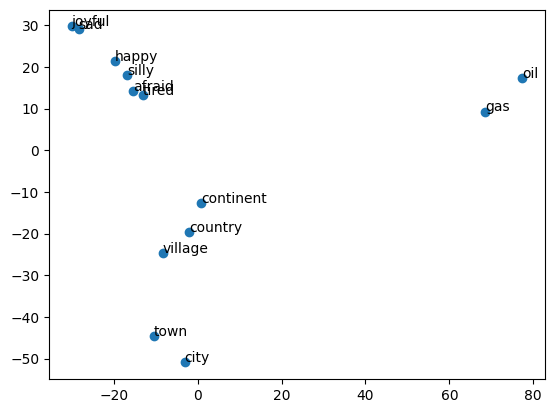

In [ ]:
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

As a figure, I attached the plotted version of these words and circled in the semantic clusters.




![Semantic Clusters](https://drive.google.com/uc?export=view&id=15jq-sShe2lAIiwjQAGf89lbIVOzsYhgR)


###Linear algebra in Neural Networks

We have another example application in data science. This time it is in computer vision, classifying handwrittend digits from the MNIST dataset. Each neuron (and the model itself) performs matrix multiplication on the weights and input values and adds in biases. This process is optimized using gradient descent - values get improved with the objective of improving the loss function.

In [ ]:
!pip3 install torch torchvision matplotlib

In [ ]:
# Importing necessary libraries

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt



Single Perceptron (Neuron):

In [ ]:
# Define w, x, and b
w_0 = torch.Tensor([[1, 2, 3]] )
x_0 = torch.Tensor([[7, 8, 9]]).T
b = torch.Tensor([[11, 12]]).T

In [ ]:
# Output of a neuron
x_1 = torch.matmul(w_0, x_0) + b
x_1 = torch.relu(x_1)
print(x_1)

tensor([[61.],
        [62.]])


Importing the Dateset:

In [ ]:
# Download training data datasets
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from datasets
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Making dataloaders
train_dataloader = DataLoader(training_data)
test_dataloader = DataLoader(test_data)



100%|██████████| 9912422/9912422 [00:00<00:00, 100060916.97it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 51503271.18it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24613377.40it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1954702.32it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw





Visiualizing the dataset:

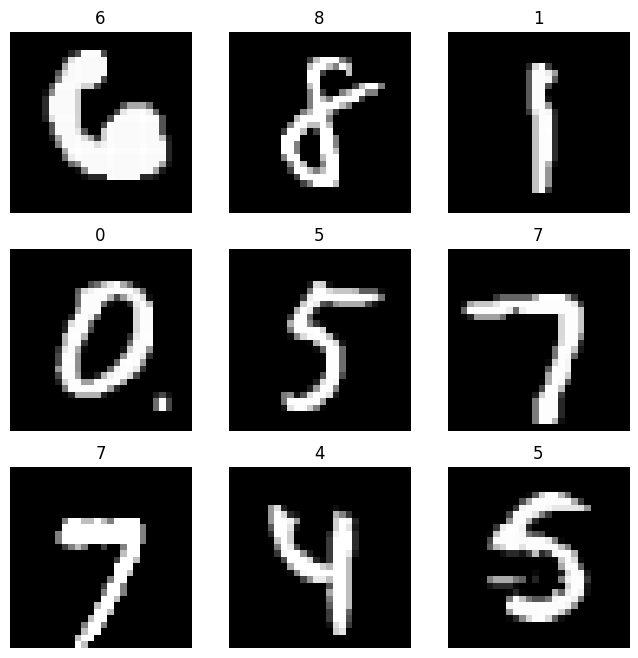

In [ ]:

# Plotting (3x3) Grid of numbers
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()




Defining a 3 layer model:

In [ ]:
# Defining appropriate weight matrices for each layer in the neural network
w_0 = torch.randn(64, 28*28)  # Weight matrix for the first layer (64 neurons, each connected to 28*28 input features)
w_1 = torch.randn(64, 64)      # Weight matrix for the second layer (64 neurons, each connected to 64 neurons in the previous layer)
w_2 = torch.randn(10, 64)      # Weight matrix for the output layer (10 neurons, each connected to 64 neurons in the previous layer)

# Defining bias vectors for each layer in the neural network
b_0 = torch.randn(64, 1)      # Bias vector for the first layer (64 biases)
b_1 = torch.randn(64, 1)      # Bias vector for the second layer (64 biases)
b_2 = torch.randn(10, 1)      # Bias vector for the output layer (10 biases)

# Defining a simple neural network model with three layers (w_0, w_1, w_2) and two activation functions (ReLU and Softmax)
def model_1(X_0):
    # Forward pass through the first layer with ReLU activation
    X_1 = torch.relu(torch.matmul(w_0, X_0) + b_0)  # Linear transformation: w_0*X_0 + b_0

    # Forward pass through the second layer with ReLU activation
    X_2 = torch.relu(torch.matmul(w_1, X_1) + b_1)  # Linear transformation: w_1*X_1 + b_1

    # Forward pass through the output layer with Softmax activation
    X_3 = torch.softmax(torch.matmul(w_2, X_2) + b_2, 0)  # Linear transformation: w_2*X_2 + b_2

    # Return the output of the neural network
    return X_3


In [ ]:
for X, y in train_dataloader:
    X = torch.reshape(X, (28*28,1))
    print(model_1(X))
    break

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])




Using built-in torch.nn:
(reference: https://pytorch.org/docs/stable/nn.html#loss-functions)

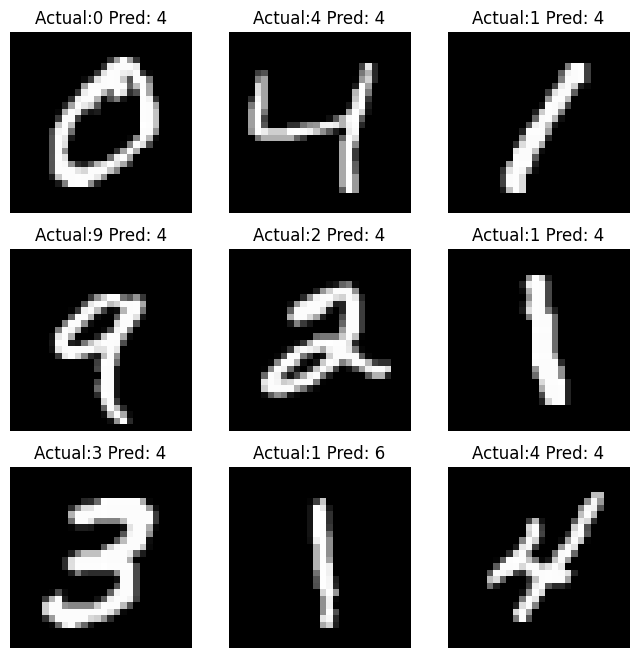

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = training_data[i]

    #Calculate the prediction
    X = torch.reshape(img, (1, 28*28))
    probs = model(X)
    preds = torch.argmax(probs).item()

    #Plotting
    figure.add_subplot(rows, cols, i)
    plt.title("Actual:"+str(label)+" Pred: "+str(preds))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()



In [ ]:
#Defining the model
model = nn.Sequential(
    nn.Linear(28*28, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
    )



###Loss Functions and Optimizers (Gradient Descent):

In [ ]:
def MSELoss(pred, actual):
    # Write this part
    loss = torch.matmul(actual - pred, actual - pred) / torch.numel(pred)
    return(loss)


Using the built-in loss functions (reference: https://pytorch.org/docs/stable/nn.html#loss-functions) and Optimizer (reference: https://pytorch.org/docs/stable/optim.html)

In [ ]:
loss_func  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Training:

In [ ]:
def train(dataloader, model, loss_func, optimizer):

    model.train()
    for batch, (X, y) in enumerate(dataloader):

        # Compute prediction error
        X = torch.reshape(X, (1, 28*28))

        # You write this part
        probs = model(X)
        loss = loss_func(probs, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

train(train_dataloader, model, loss_func, optimizer)

Testing:

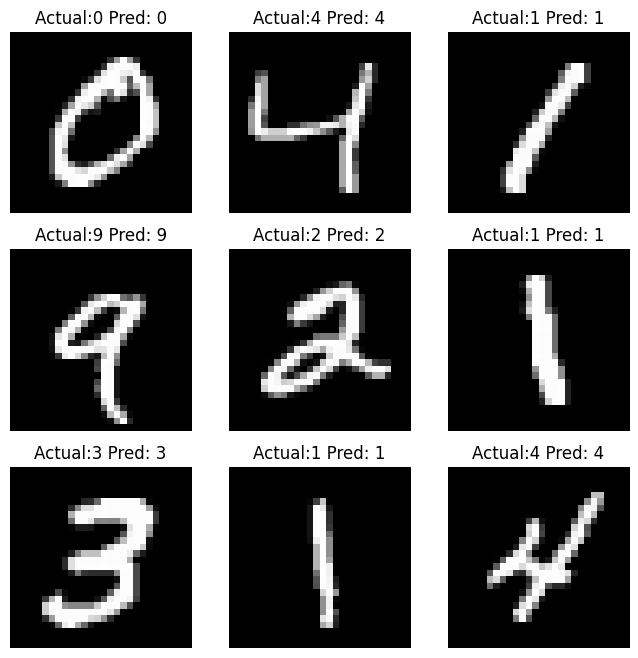

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = testing_data[i]

    #Calculate the prediction
    X = torch.reshape(img, (1, 28*28))
    probs = model(X)
    preds = torch.argmax(probs).item()

    #Plotting
    figure.add_subplot(rows, cols, i)
    plt.title("Actual:"+str(label)+" Pred: "+str(preds))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()




In [ ]:
def test(dataloader, model, loss_funcn):
    model.eval()
    test_loss, correct = 0, 0
    size = len(dataloader.dataset)

    with torch.no_grad():
        for X, y in dataloader:
            X = torch.reshape(X, (1, 28*28))
            pred = model(X)
            test_loss += loss_func(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%")

test(train_dataloader, model, loss_func)

Test Error: 
 Accuracy: 90.8%
